In [248]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

### Get the Raw Data.

In [277]:
initial_df=pd.read_csv("LCD_Dataset.csv")

/Users/jasonsmith/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33,34,42,43,49,73,75,76,89) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [279]:
initial_df.head()

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,TStorms,WindEquipmentChangeDate
0,72681024131,2018-08-01T00:53:00,FM-15,7,NaN,E,1.5,mi,PRECIP,2856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/7/07
1,72681024131,2018-08-01T01:53:00,FM-15,7,NaN,E,1.5,mi,PRECIP,2856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/7/07
2,72681024131,2018-08-01T02:53:00,FM-15,7,NaN,E,1.5,mi,PRECIP,2856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/7/07
3,72681024131,2018-08-01T03:53:00,FM-15,7,NaN,E,1.5,mi,PRECIP,2856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/7/07
4,72681024131,2018-08-01T04:53:00,FM-15,7,NaN,E,1.5,mi,PRECIP,2856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/7/07


### Get Rid of All Unnecessary Columns and Rows

First the colums.

In [117]:
all_col_names=set(initial_df.columns)
useful_col_names=set([
 'REPORT_TYPE',
 'DailyAverageDryBulbTemperature',
 'DailyAverageRelativeHumidity',
 'DailyAverageStationPressure',
 'DailyAverageWindSpeed',
 'DailyMaximumDryBulbTemperature',
 'DailyMinimumDryBulbTemperature',
 'DailyPeakWindDirection',
 'DailyPeakWindSpeed',
 'DailyPrecipitation',
 'DailySnowDepth',
 'DailySnowfall',
 'DailySustainedWindDirection',
 'DailySustainedWindSpeed'])

In [211]:
drop_col_names=all_col_names.difference(useful_col_names)
#drop_col_names

In [212]:
weather=initial_df.drop(list(drop_col_names), axis=1)

In [213]:
weather.head()

,REPORT_TYPE,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageStationPressure,DailyAverageWindSpeed,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed
0,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now the rows.

In [215]:
weather=weather[weather["REPORT_TYPE"]=="SOD  "]

In [216]:
weather=weather.drop(["REPORT_TYPE"], axis = 1)

In [217]:
weather=weather.reset_index()

In [218]:
weather.head()

,index,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageStationPressure,DailyAverageWindSpeed,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed
0,27,86.0,27.0,26.93,6.9,100.0,71.0,240.0,17.0,0,0,0,150.0,12.0
1,56,81.0,25.0,26.93,6.0,96.0,66.0,340.0,22.0,0,0,0,340.0,15.0
2,85,75.0,25.0,26.97,8.4,88.0,61.0,310.0,30.0,0,0,0,320.0,18.0
3,114,72.0,33.0,26.95,6.5,87.0,56.0,330.0,22.0,0,0,0,330.0,17.0
4,143,75.0,29.0,27.01,6.7,90.0,60.0,310.0,26.0,0,0,0,310.0,18.0


In [219]:
weather=weather.drop(["index"], axis=1)

In [220]:
weather.head()

,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageStationPressure,DailyAverageWindSpeed,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed
0,86.0,27.0,26.93,6.9,100.0,71.0,240.0,17.0,0,0,0,150.0,12.0
1,81.0,25.0,26.93,6.0,96.0,66.0,340.0,22.0,0,0,0,340.0,15.0
2,75.0,25.0,26.97,8.4,88.0,61.0,310.0,30.0,0,0,0,320.0,18.0
3,72.0,33.0,26.95,6.5,87.0,56.0,330.0,22.0,0,0,0,330.0,17.0
4,75.0,29.0,27.01,6.7,90.0,60.0,310.0,26.0,0,0,0,310.0,18.0


Now change the column names.

In [221]:
list(useful_col_names)

['DailyPeakWindDirection',
 'DailyAverageStationPressure',
 'DailySustainedWindDirection',
 'DailyMinimumDryBulbTemperature',
 'DailySnowfall',
 'DailyAverageWindSpeed',
 'DailyAverageDryBulbTemperature',
 'REPORT_TYPE',
 'DailyPrecipitation',
 'DailySnowDepth',
 'DailySustainedWindSpeed',
 'DailyMaximumDryBulbTemperature',
 'DailyAverageRelativeHumidity',
 'DailyPeakWindSpeed']

In [222]:
weather=weather.rename(columns={'DailySnowfall':"snowFall", 'DailyAverageWindSpeed':'WindSpd','DailyPeakWindDirection': 'PeakWindDir', 'DailyAverageStationPressure':'Pressure', 'DailyAverageRelativeHumidity':'Humidity', 'DailyAverageDryBulbTemperature':'DryBulbTemp', 'DailyMinimumDryBulbTemperature':'MinDryBulbTemp',  'DailyPeakWindSpeed': 'PeakWindSpeed', 'DailyPrecipitation':'Precip', 'DailyMaximumDryBulbTemperature':'MaxDryBulbTemp', 'DailySnowDepth':'SnowDepth', 'DailySustainedWindDirection':'SustainedWindDir', 'DailySustainedWindSpeed':'SustainedWindSpeed'})

In [223]:
weather.head()

,DryBulbTemp,Humidity,Pressure,WindSpd,MaxDryBulbTemp,MinDryBulbTemp,PeakWindDir,PeakWindSpeed,Precip,SnowDepth,snowFall,SustainedWindDir,SustainedWindSpeed
0,86.0,27.0,26.93,6.9,100.0,71.0,240.0,17.0,0,0,0,150.0,12.0
1,81.0,25.0,26.93,6.0,96.0,66.0,340.0,22.0,0,0,0,340.0,15.0
2,75.0,25.0,26.97,8.4,88.0,61.0,310.0,30.0,0,0,0,320.0,18.0
3,72.0,33.0,26.95,6.5,87.0,56.0,330.0,22.0,0,0,0,330.0,17.0
4,75.0,29.0,27.01,6.7,90.0,60.0,310.0,26.0,0,0,0,310.0,18.0


### Deal With NaN Values

In [224]:
weather.shape

(1097, 13)

Luckily there are just a few NaNs.

In [225]:
weather.count()

DryBulbTemp           1097
Humidity              1094
Pressure              1095
WindSpd               1097
MaxDryBulbTemp        1097
MinDryBulbTemp        1097
PeakWindDir           1097
PeakWindSpeed         1097
Precip                1097
SnowDepth             1097
snowFall              1097
SustainedWindDir      1097
SustainedWindSpeed    1097
dtype: int64

In [226]:
weather[weather["Pressure"].isna() | weather["Humidity"].isna()]

,DryBulbTemp,Humidity,Pressure,WindSpd,MaxDryBulbTemp,MinDryBulbTemp,PeakWindDir,PeakWindSpeed,Precip,SnowDepth,snowFall,SustainedWindDir,SustainedWindSpeed
139,42.0,NaN,NaN,7.8,45.0,38.0,120.0,30.0,0.15,0,0,110.0,24.0
469,44.0,NaN,NaN,3.2,56.0,32.0,120.0,11.0,0,0,0,120.0,9.0
1096,76.0,NaN,27.15,4.3,82.0,69.0,310.0,15.0,0.14,0,0,170.0,12.0


Since no pressure value, I dropped rows $139$ and $469$.

In [227]:
weather=weather.drop([139,469])

Getting closer to removing all NaNs.

In [228]:
weather.count()

DryBulbTemp           1095
Humidity              1094
Pressure              1095
WindSpd               1095
MaxDryBulbTemp        1095
MinDryBulbTemp        1095
PeakWindDir           1095
PeakWindSpeed         1095
Precip                1095
SnowDepth             1095
snowFall              1095
SustainedWindDir      1095
SustainedWindSpeed    1095
dtype: int64

Since we have the other important values, I chose to replace the one remaining NaN with 0.

In [230]:
weather["Humidity"].fillna(0, inplace=True)

No more NaNs.

In [231]:
weather.count()

DryBulbTemp           1095
Humidity              1095
Pressure              1095
WindSpd               1095
MaxDryBulbTemp        1095
MinDryBulbTemp        1095
PeakWindDir           1095
PeakWindSpeed         1095
Precip                1095
SnowDepth             1095
snowFall              1095
SustainedWindDir      1095
SustainedWindSpeed    1095
dtype: int64

In [232]:
weather.head()

,DryBulbTemp,Humidity,Pressure,WindSpd,MaxDryBulbTemp,MinDryBulbTemp,PeakWindDir,PeakWindSpeed,Precip,SnowDepth,snowFall,SustainedWindDir,SustainedWindSpeed
0,86.0,27.0,26.93,6.9,100.0,71.0,240.0,17.0,0,0,0,150.0,12.0
1,81.0,25.0,26.93,6.0,96.0,66.0,340.0,22.0,0,0,0,340.0,15.0
2,75.0,25.0,26.97,8.4,88.0,61.0,310.0,30.0,0,0,0,320.0,18.0
3,72.0,33.0,26.95,6.5,87.0,56.0,330.0,22.0,0,0,0,330.0,17.0
4,75.0,29.0,27.01,6.7,90.0,60.0,310.0,26.0,0,0,0,310.0,18.0


### Create Label Column

In [235]:
weather["Rained"]="0"

In [236]:
def change(string):
    if string=='0':
        return 0
    else:
        return 1

In [237]:
weather["Rained"]=weather.Precip.apply(lambda x: change(x))

#### An Unforseen Problem

I had significant trouble using code that I have used before, and used successfully on a smaller example, to create my label column.  After many attempts I settled on the solution above.  I originally thought the issue was that the Precip column is of string type.  However, after I got it to work, I noticed that some of my precipitation values were a "T".  Due to time constraints I chose to drop all rows that have a Precip value of "T.    

In [243]:
weather=weather[weather["Precip"]!="T"]

### Train the Model

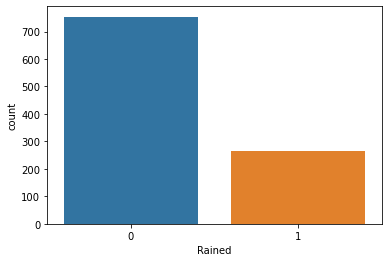

In [250]:
ax = sns.countplot(x="Rained", data=weather)

In [260]:
feature_columns=list(weather.columns)

In [262]:
feature_columns.remove("Rained")

In [263]:
feature_columns

['DryBulbTemp',
 'Humidity',
 'Pressure',
 'WindSpd',
 'MaxDryBulbTemp',
 'MinDryBulbTemp',
 'PeakWindDir',
 'PeakWindSpeed',
 'Precip',
 'SnowDepth',
 'snowFall',
 'SustainedWindDir',
 'SustainedWindSpeed']

In [272]:
X=weather[feature_columns]
y=weather.Rained

In [273]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=25)

#### The T Problem Returns

After trying to fit the model, I realized there were more "T"s in my data.  This is a problem I will address for HW5.

In [274]:
weather=weather.replace("T",0)

In [275]:
model=LogisticRegression(max_iter=5000)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

### Accuracy

In [283]:
(y_pred==y_test).sum()/len(y_test)

0.8941176470588236

Since the average number of rainy days for a year in Boise is $90$, a wild guess would produce an accuracy of $0.75$.  
So, my model did better than a wild guess.